# Measure spectral indices

**1) Consider pre-defined spectral indices to measure the depth of water, methane, ammonia, and silicates absorption features in mid-infrared spectra of ultracool objects.**

**2) Define your own spectral indices to measure the strength of other spectral features of interest at any wavelength.**

In [1]:
import seda
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from astropy.io import ascii


    SEDA package imported


Read the spectra of interest.

As an example, for silicate and water indices let's read the Spitzer IRS spectrum for the L6 dwarf 2MASS J21481628+4003593 published in [Looper et al. (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJ...686..528L) and reprocessed by [Suárez & Metchev (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.5701S/abstract).

This spectrum has a strong silicate absorption at 9.3 microns and prominent water absorption at 6.25 microns.

In [12]:
IRS = ascii.read('data/2148+4003_IRS_spectrum.dat')
wl_2148 = IRS['wl(um)'] # in um
flux_2148 = IRS['flux(Jy)'] # in Jy
eflux_2148 = IRS['eflux(Jy)'] # in Jy

Plot the spectrum:

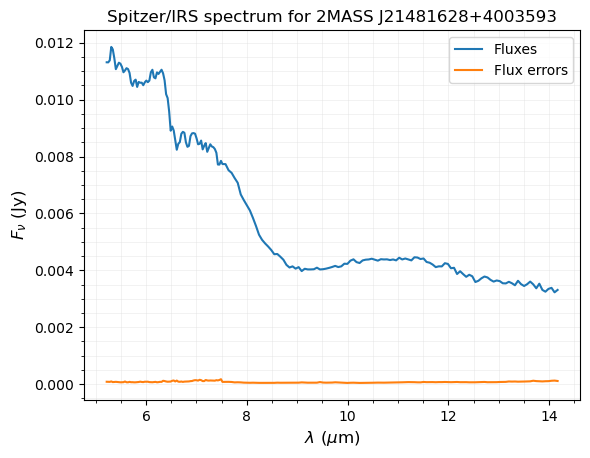

In [28]:
fig, ax = plt.subplots()

plt.plot(wl_2148, flux_2148, label='Fluxes')
plt.plot(wl_2148, eflux_2148, label='Flux errors')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)
ax.legend()

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$ (Jy)', size=12)
plt.title('Spitzer/IRS spectrum for 2MASS J21481628+4003593')

plt.show()

**Measure the silicate index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.silicate_index) or using the following command directly in your notebook:

``help(seda.silicate_index)``

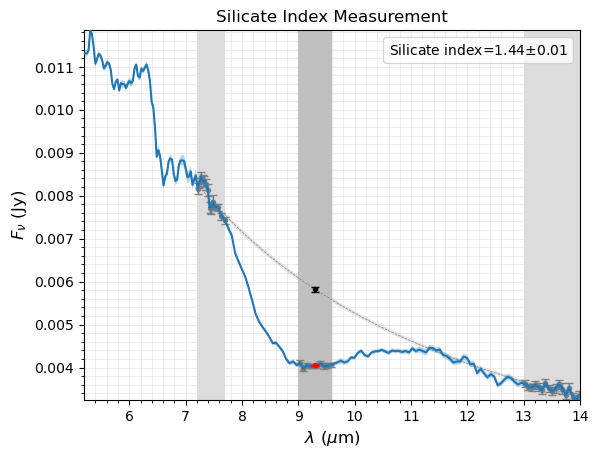

In [14]:
out_silicate_index = seda.silicate_index(wl_2148, flux_2148, eflux_2148, 
                                         plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [15]:
silicate_index = out_silicate_index['silicate_index'] # silicate index
esilicate_index = out_silicate_index['esilicate_index'] # silicate index error
print(f'silicate index = {round(silicate_index,2)}+-{round(esilicate_index,2)}')

silicate index = 1.44+-0.01


**Measure the water index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.water_index).

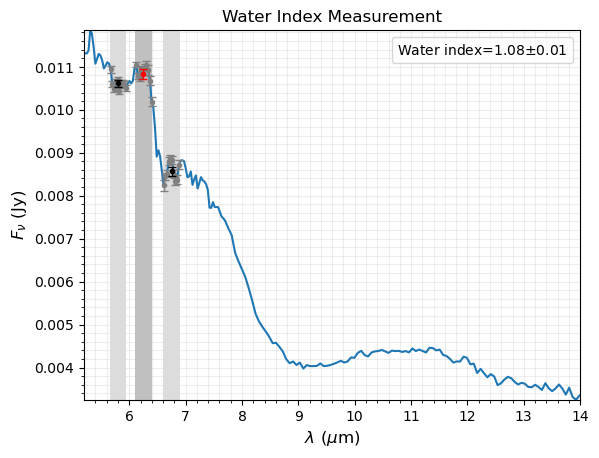

In [16]:
out_water_index = seda.water_index(wl_2148, flux_2148, eflux_2148, 
                                   plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [17]:
water_index = out_water_index['water_index'] # water index
ewater_index = out_water_index['ewater_index'] # water index uncertainty
print(f'water index = {round(water_index,2)}+-{round(ewater_index,2)}')

water index = 1.08+-0.01


For methane and ammonia indices:

Read Spitzer IRS spectrum for the T8 dwarf 2MASS J04151954-0935066 
published in [Saumon et al. (2007)](https://ui.adsabs.harvard.edu/abs/2007ApJ...656.1136S) and reprocessed by [Suárez & Metchev (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.5701S/abstract).

This spectrum has strong absorptions by methane at 7.65 microns and ammonia at 6.25 microns.

In [18]:
IRS = ascii.read('data/0415-0935_IRS_spectrum.dat')
wl_0415 = IRS['wl(um)'] # in um
flux_0415 = IRS['flux(Jy)'] # in Jy
eflux_0415 = IRS['eflux(Jy)'] # in Jy

Plot the spectrum:

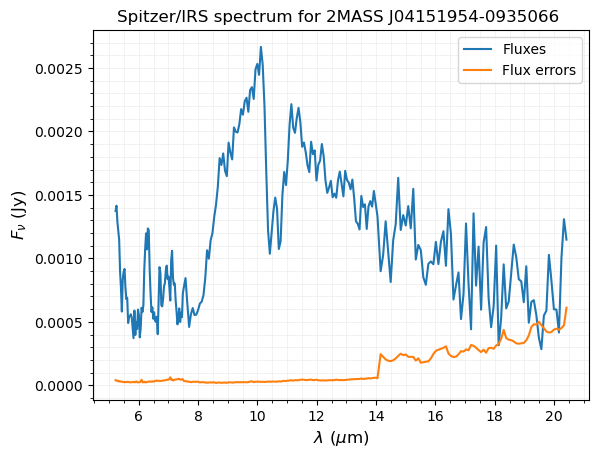

In [29]:
fig, ax = plt.subplots()

plt.plot(wl_0415, flux_0415, label='Fluxes')
plt.plot(wl_0415, eflux_0415, label='Flux errors')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)
ax.legend()

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$ (Jy)', size=12)
plt.title('Spitzer/IRS spectrum for 2MASS J04151954-0935066 ')

plt.show()

**Measure the methane index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.methane_index).

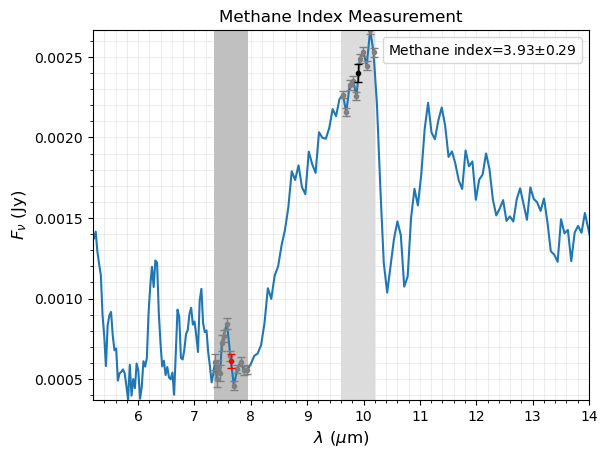

In [20]:
out_methane_index = seda.methane_index(wl_0415, flux_0415, eflux_0415, 
                                       plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [21]:
methane_index = out_methane_index['methane_index'] # methane index
emethane_index = out_methane_index['emethane_index'] # methane index uncertainty
print(f'methane index = {round(methane_index,2)}+-{round(emethane_index,2)}')

methane index = 3.93+-0.29


**Measure the ammonia index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.ammonia_index).

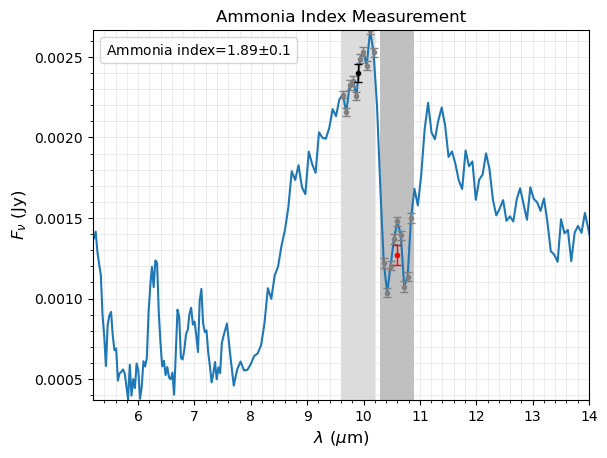

In [22]:
out_ammonia_index = seda.ammonia_index(wl_0415, flux_0415, eflux_0415,
                                       plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [23]:
ammonia_index = out_ammonia_index['ammonia_index'] # ammonia index
eammonia_index = out_ammonia_index['eammonia_index'] # ammonia index uncertainty
print(f'ammonia index = {round(ammonia_index,2)}+-{round(eammonia_index,2)}')

ammonia index = 1.89+-0.1


**Measure a user-defined index for CO2**

Read the spectrum exbihiting the feature of interest.

As an example, let's read the AKARI/IRC spectrum for the T8 dwarf 2MASS J04151954-0935066 in [Sorahana & Yamamura (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...760..151S).

This spectrum has strong CH4 at 3.3 microns, CO at 4.6 microns, and CO2 at 4.2 microns.

Read the AKARI spectrum:

In [31]:
AKARI_name = 'data/0415-0935_AKARI_spectrum.dat'
AKARI = ascii.read(AKARI_name)
wl_AKARI = AKARI['wl(um)'] # um 
flux_AKARI = AKARI['flux(Jy)'] # Jy
eflux_AKARI = AKARI['eflux(Jy)'] # Jy

Plot the spectrum

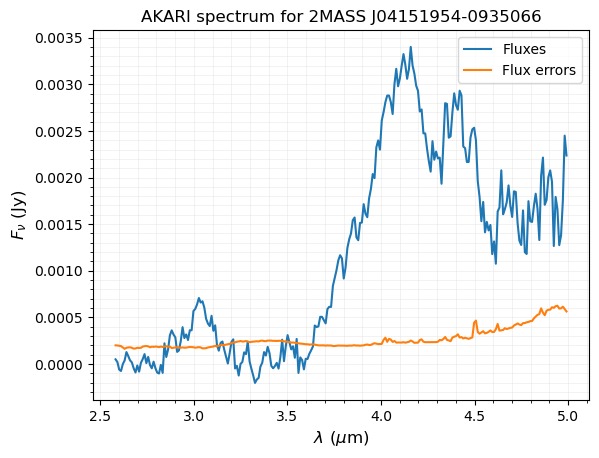

In [32]:
fig, ax = plt.subplots()

plt.plot(wl_AKARI, flux_AKARI, label='Fluxes')
plt.plot(wl_AKARI, eflux_AKARI, label='Flux errors')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)
ax.legend()

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$ (Jy)', size=12)
plt.title('AKARI spectrum for 2MASS J04151954-0935066')

plt.show()

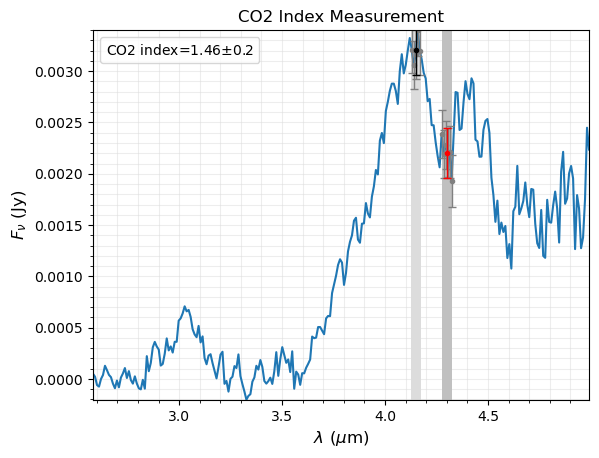

In [39]:
# wavelength at the center of the feature
wl_in = 4.3 # um 
# wavelength at the continuum region
wl_out = 4.15 # um 
# wavelength window to obtain the mean fluxes within and out of the feature
wl_window = 0.05 # um
# set a name for the index
index_name = 'CO2'

# measure the user-defined index
out_user_index = seda.user_index(wl=wl_AKARI, flux=flux_AKARI, eflux=eflux_AKARI, 
                wl_in=wl_in, wl_out=wl_out, wl_window=wl_window, index_name=index_name,
                plot=True, plot_save=True)